<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EJERCICIO # 1**

In [1]:
import numpy as np
import pandas as pd
import datetime

url1 = 'https://raw.githubusercontent.com/smarvar/Machine-Learning-UNS/master/4_DataWrangling/data/camas_covid_bahia.csv'
da = pd.read_csv(url1)

#Nota:
para ver los datos en función del tiempo hago uso del metodo datatime, el cual permite mostrar una fecha en función de dias, semanas, meses, etc. 

In [2]:
da['fecha'] = pd.to_datetime(da['fecha'])
da['mes'] = da['fecha'].dt.month
da['semana'] = da['fecha'].dt.week
da['dia_semana'] = da['fecha'].dt.weekday + 1
da.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,informeNumero,fecha,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,observaciones,mes,semana,dia_semana
0,131,2020-09-25,848,401,47,163,42,84,77,32,24,142,41,69,25,147,19,4,NaN,9,39,5
1,130,2020-09-24,848,391,46,163,25,86,68,32,17,142,39,69,21,147,21,4,NaN,9,39,4
2,129,2020-09-23,848,402,47,163,21,85,65,32,22,142,42,71,23,147,19,4,NaN,9,39,3
3,128,2020-09-22,848,391,46,163,30,83,69,32,21,142,43,72,24,147,15,4,NaN,9,39,2
4,127,2020-09-21,848,368,43,163,32,82,69,32,24,142,40,72,24,147,10,4,NaN,9,39,1


Obtenemos los parametros generales del Dataset

In [3]:
da.describe()

,informeNumero,total_camas_hospitales,camas_ocupadas_hospitales,porcentaje_ocupacion_camas_hospitales,camas_covid,camas_sospechosos_covid,camas_confirmados_covid,porcentaje_ocupacion_camas_covid,uti_covid_totales,uti_covid_ocupadas,respiradores_totales,respiradores_ocupados,respiradores_covid_totales,respiradores_covid_ocupados,total_camas_ucma,total_camas_ocupadas_ucma,sedes_ucma,mes,semana,dia_semana
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,70.670455,817.500000,350.159091,40.920455,162.068182,19.647727,34.909091,32.795455,31.636364,8.170455,137.181818,24.284091,39.943182,8.386364,144.159091,5.170455,3.715909,7.909091,32.931818,3.977273
std,42.113072,155.002113,77.216502,9.006028,18.349603,6.586367,21.706843,15.509107,1.598719,7.014307,26.004220,8.541917,27.322408,7.529912,4.535648,4.334363,0.453565,0.825406,3.660273,1.982552
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,3.000000,6.000000,27.000000,1.000000
25%,30.750000,848.000000,325.750000,38.000000,163.000000,15.750000,20.000000,22.000000,32.000000,3.000000,142.000000,20.000000,0.000000,0.000000,137.000000,3.000000,3.000000,7.000000,30.000000,2.000000
50%,87.500000,848.000000,367.500000,43.000000,163.000000,18.000000,25.000000,26.500000,32.000000,4.500000,142.000000,25.000000,54.000000,7.500000,147.000000,4.000000,4.000000,8.000000,33.000000,4.000000
75%,109.250000,848.000000,391.000000,46.000000,163.000000,23.000000,52.250000,44.250000,32.000000,13.250000,142.000000,28.000000,62.000000,14.000000,147.000000,6.000000,4.000000,9.000000,36.000000,6.000000
max,131.000000,851.000000,450.000000,53.000000,177.000000,42.000000,86.000000,77.000000,33.000000,24.000000,143.000000,43.000000,72.000000,25.000000,147.000000,21.000000,4.000000,9.000000,39.000000,7.000000


In [4]:
da2 = da.drop(['fecha', 'observaciones', 'mes', 'semana', 'dia_semana'], axis=1)

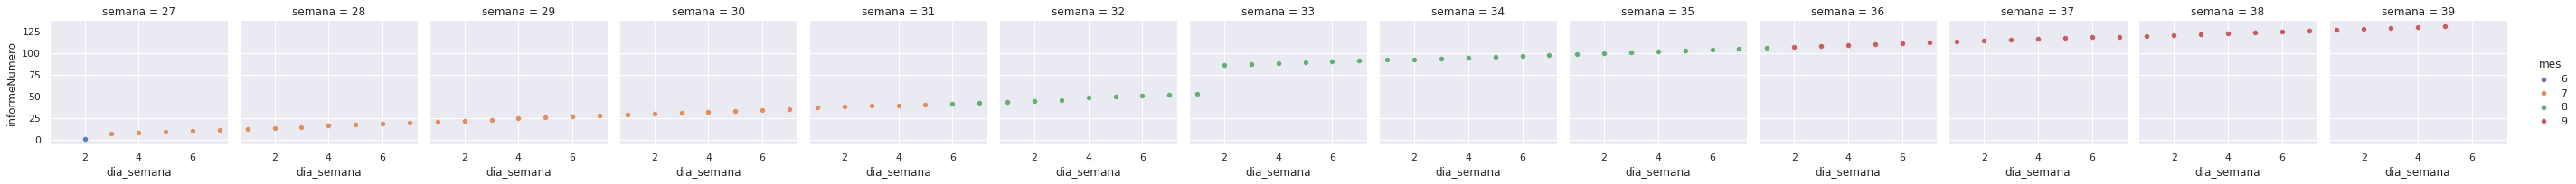

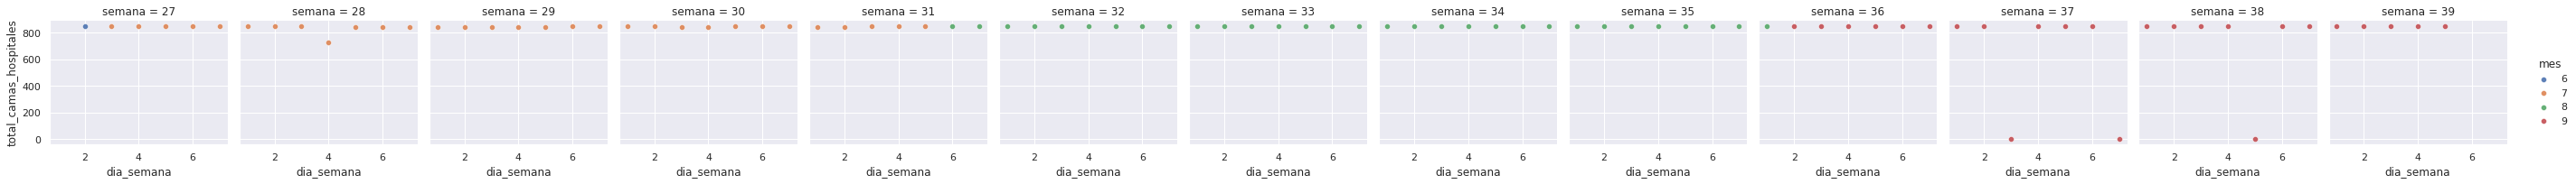

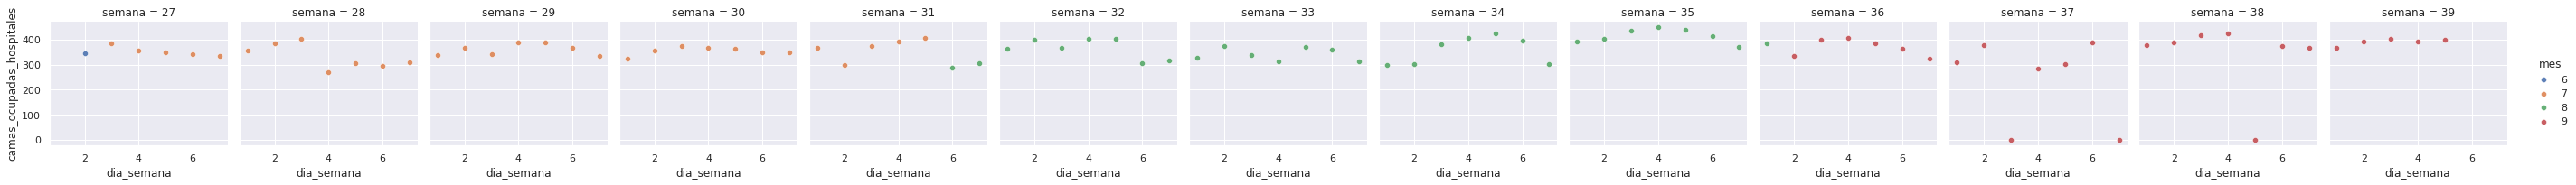

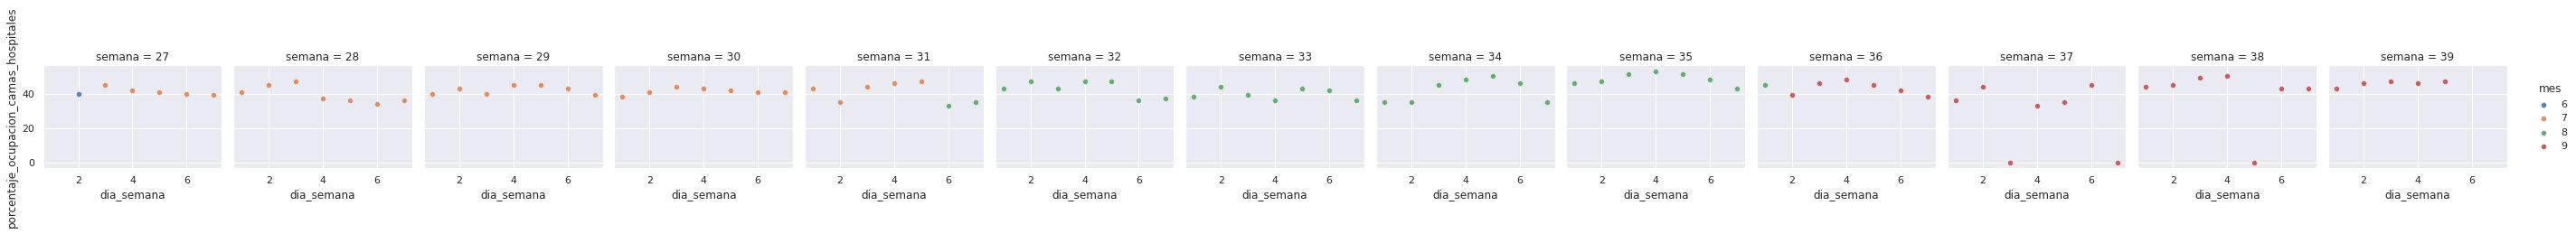

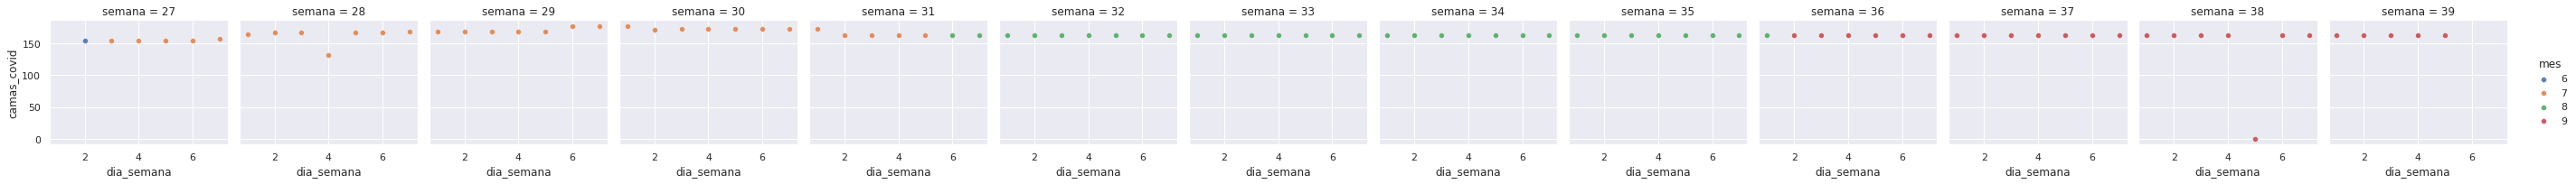

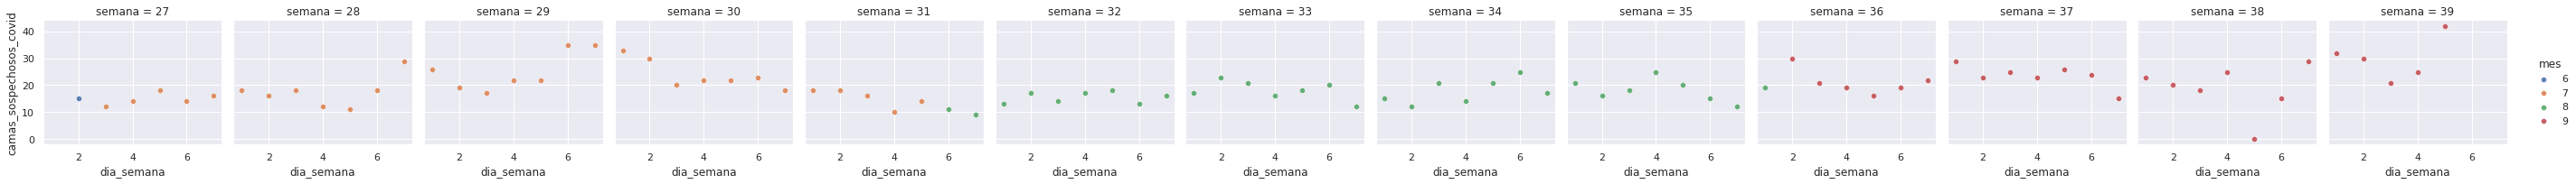

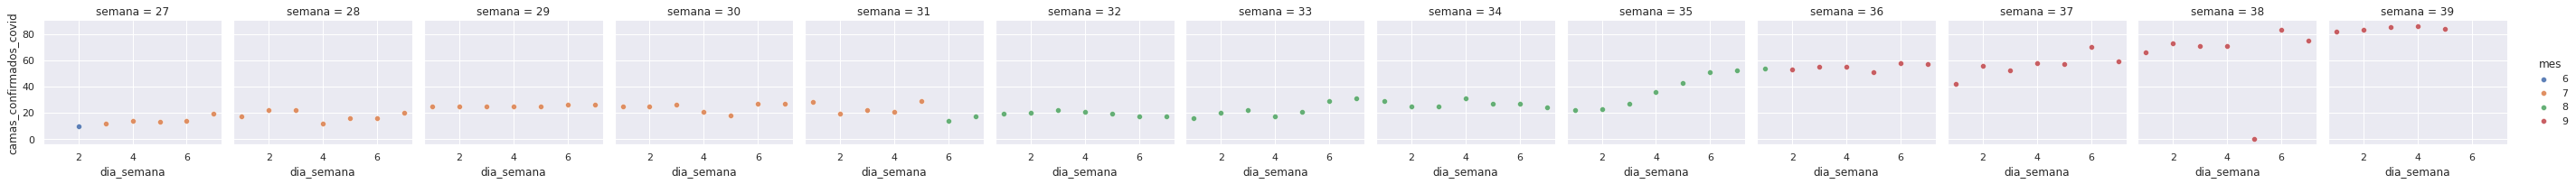

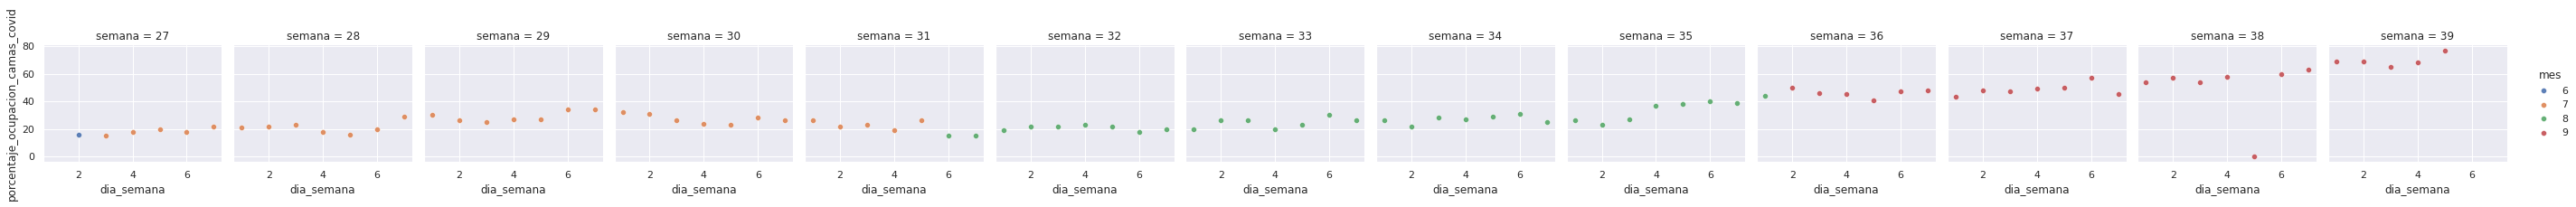

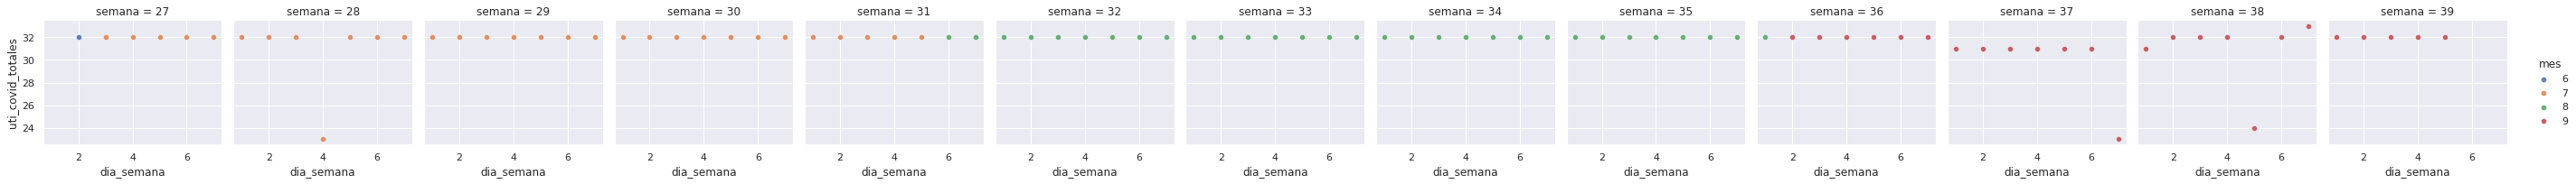

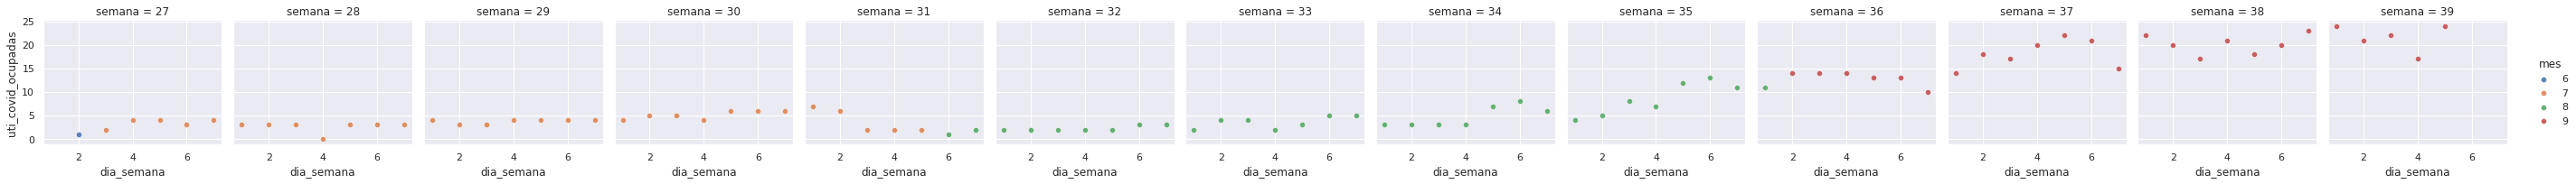

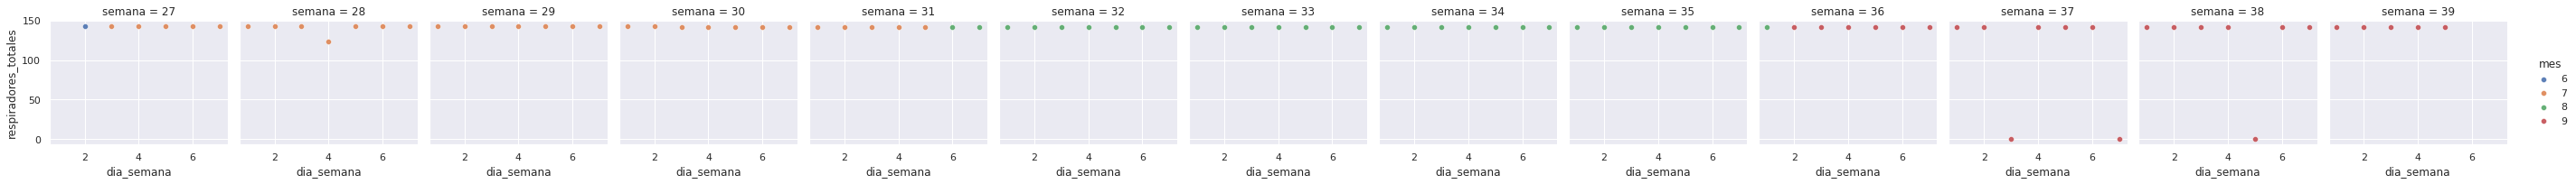

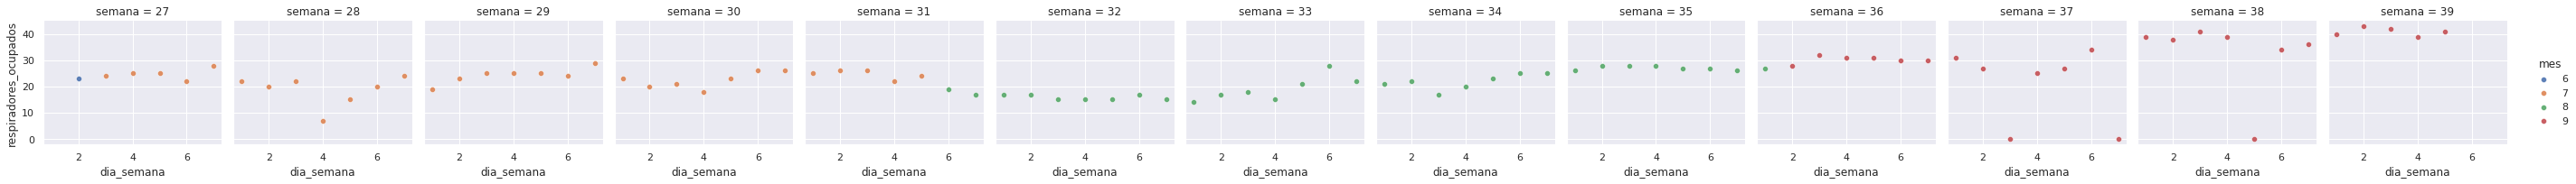

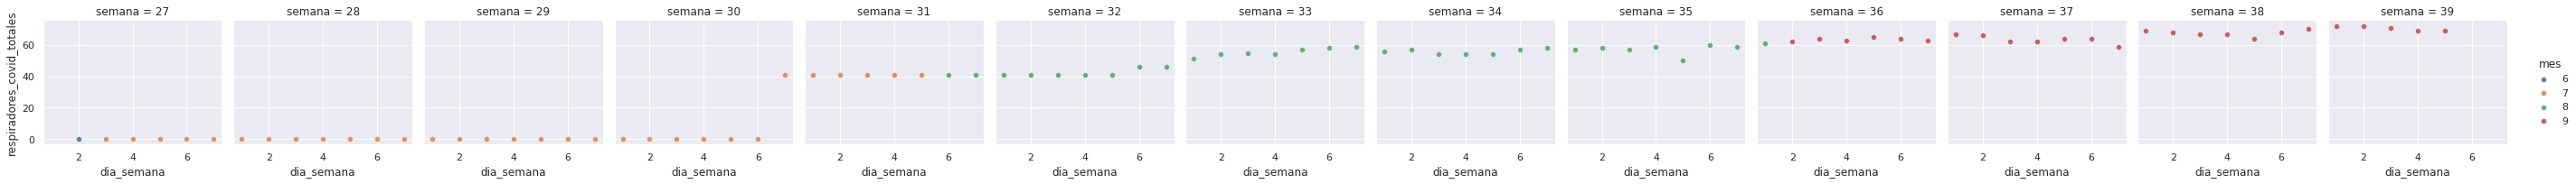

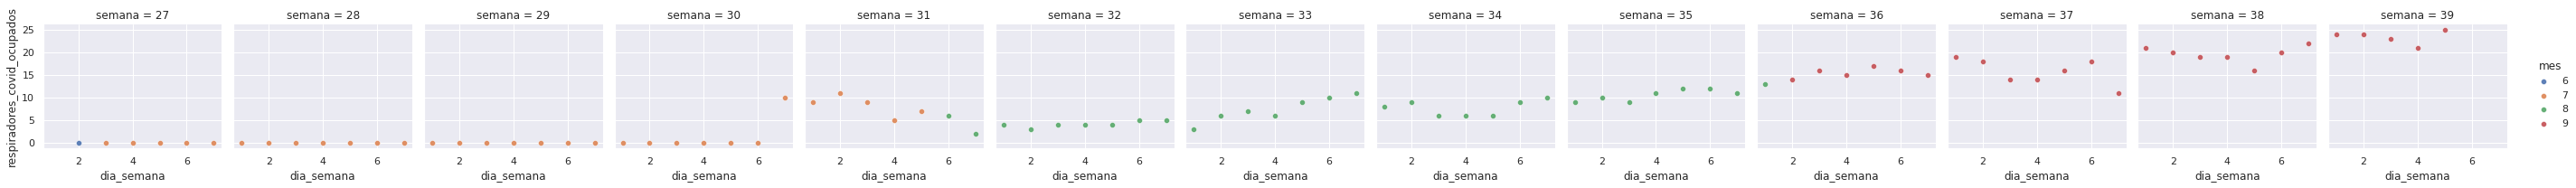

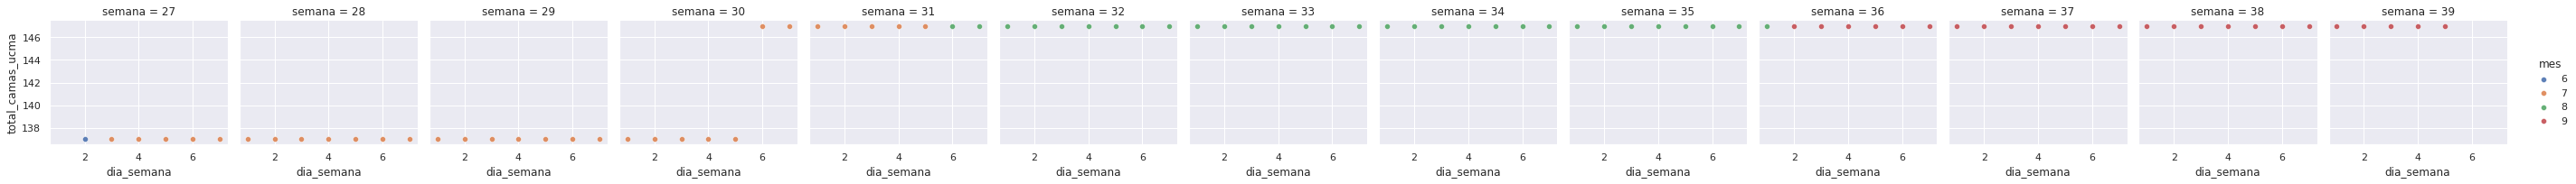

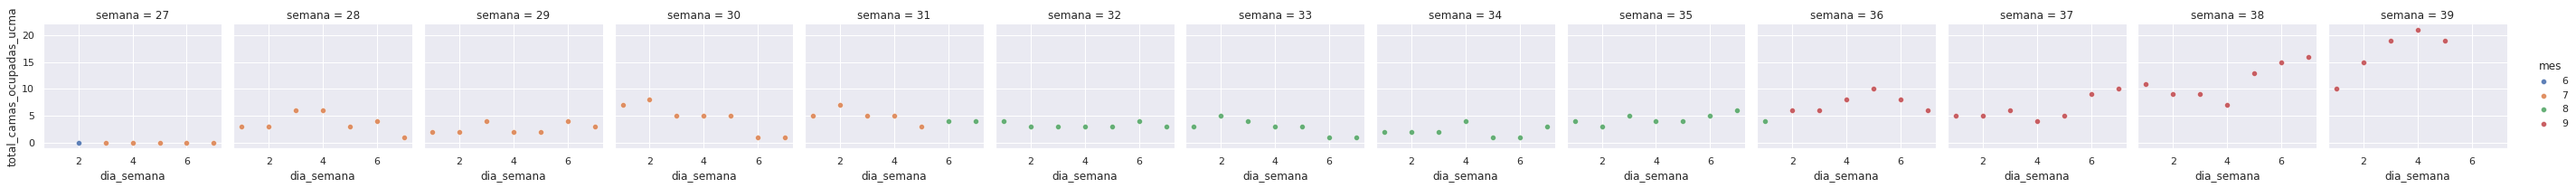

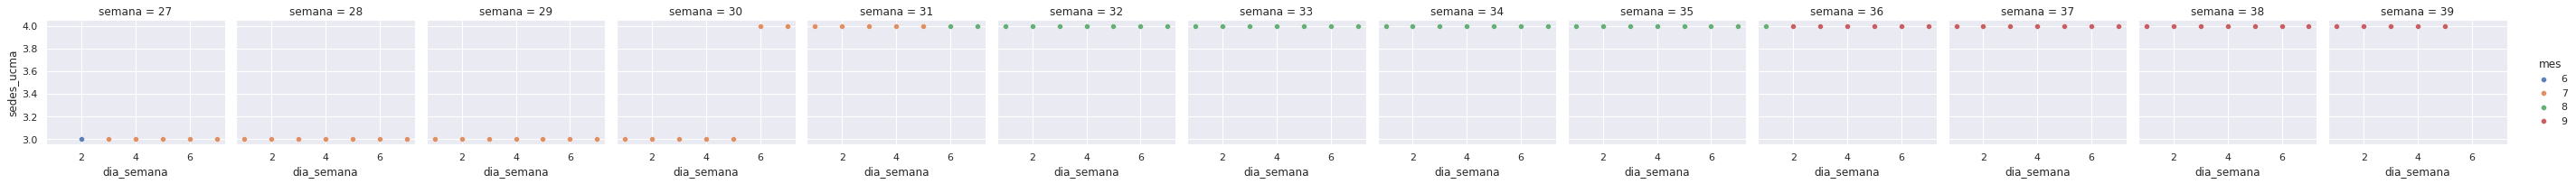

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")
plot = {a: sns.FacetGrid(da, hue ="mes", col='semana').map(sns.scatterplot, "dia_semana", str(a), alpha=.9).add_legend() for a in da2}

# Observaciones
Es interesante ver el comportamiento de los atributos del dataset en función del tiempo. Como valores atipicos se encontro:
En el mes de Sep semana 37 el dia 3 y 7 posiblemente no hubo registro de datos en respiradores ocupados, respiradores totales, uti covid totales, % de ocupacion camas hostitales, camas ocupadas, entre otras.
En general las variables muestran un comportamiento con tendencia creciente a medida que pasan los dias, como fruto del aumento de casos de Covid, a excepcion de algunos atributos que son mas una constante como por Ej el numero de camas covid, respiradores totales entre otros.

In [6]:
url2 = 'https://raw.githubusercontent.com/smarvar/Machine-Learning-UNS/master/4_DataWrangling/data/casos_covid_bahia.csv'
db = pd.read_csv(url2)

In [7]:
db['fecha'] = pd.to_datetime(db['fecha'])
db['mes'] = db['fecha'].dt.month
db['semana'] = db['fecha'].dt.week
db['dia_semana'] = db['fecha'].dt.weekday + 1
db.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,fecha,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,mes,semana,dia_semana
0,2020-06-30,106,29,71,6,574,23,342,2338,181,0,6,27,2
1,2020-07-01,114,31,77,6,581,22,342,2207,172,0,7,27,3
2,2020-07-02,124,40,78,6,588,24,356,2162,176,0,7,27,4
3,2020-07-03,137,53,78,6,606,31,356,2353,190,0,7,27,5
4,2020-07-04,154,70,78,6,622,31,356,2377,214,0,7,27,6


In [8]:
db.describe()

,confirmados,activos,recuperados,decesos,descartados,sospechosos,contencion_psicologica,monitoreo_epidemiologico,aislamiento_por_contacto_estrecho,aprehendidos,mes,semana,dia_semana
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.000000
mean,944.977273,403.738636,516.238636,25.000000,2007.647727,157.613636,407.295455,1360.386364,287.920455,0.0,7.909091,32.931818,3.977273
std,741.951512,377.382561,369.502430,16.613248,951.537510,101.144080,21.174241,289.810181,113.161691,0.0,0.825406,3.660273,1.982552
min,106.000000,29.000000,71.000000,6.000000,574.000000,22.000000,342.000000,1014.000000,169.000000,0.0,6.000000,27.000000,1.000000
25%,422.000000,201.250000,164.000000,13.000000,1159.250000,96.000000,417.000000,1215.000000,206.250000,0.0,7.000000,30.000000,2.000000
50%,706.500000,238.000000,502.000000,20.000000,1999.500000,122.000000,417.000000,1280.000000,246.500000,0.0,8.000000,33.000000,4.000000
75%,1262.750000,487.750000,742.250000,32.750000,2794.500000,232.250000,417.000000,1374.750000,370.500000,0.0,9.000000,36.000000,6.000000
max,3012.000000,1512.000000,1434.000000,66.000000,3738.000000,382.000000,417.000000,2377.000000,625.000000,0.0,9.000000,39.000000,7.000000


In [9]:
db2 = db.drop(['fecha', 'mes', 'semana', 'dia_semana'], axis=1)

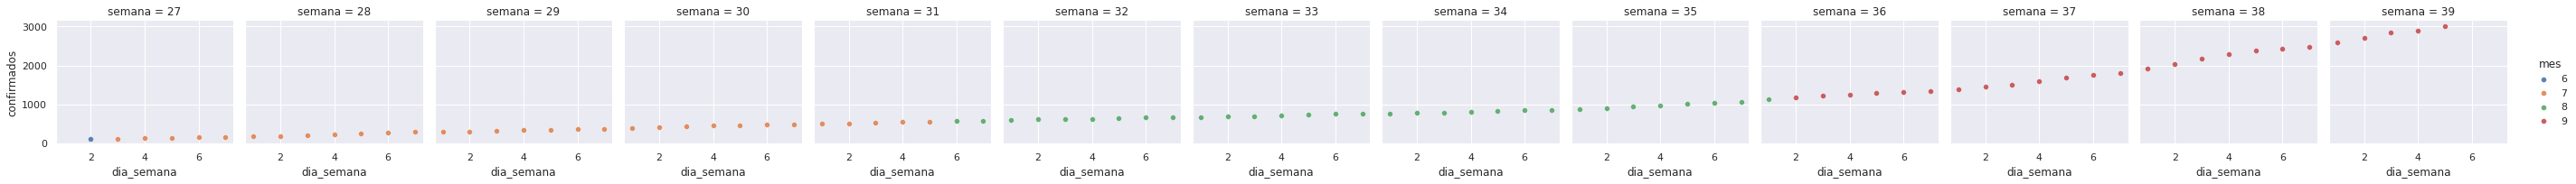

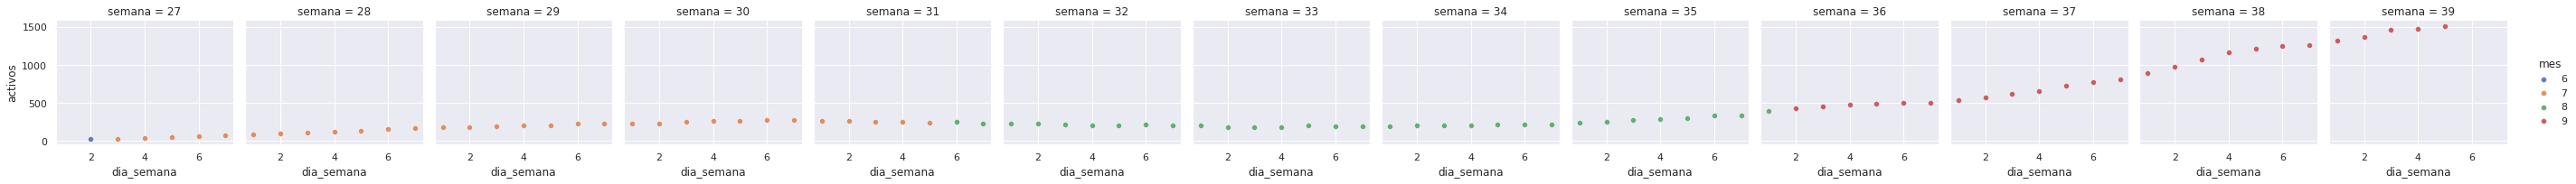

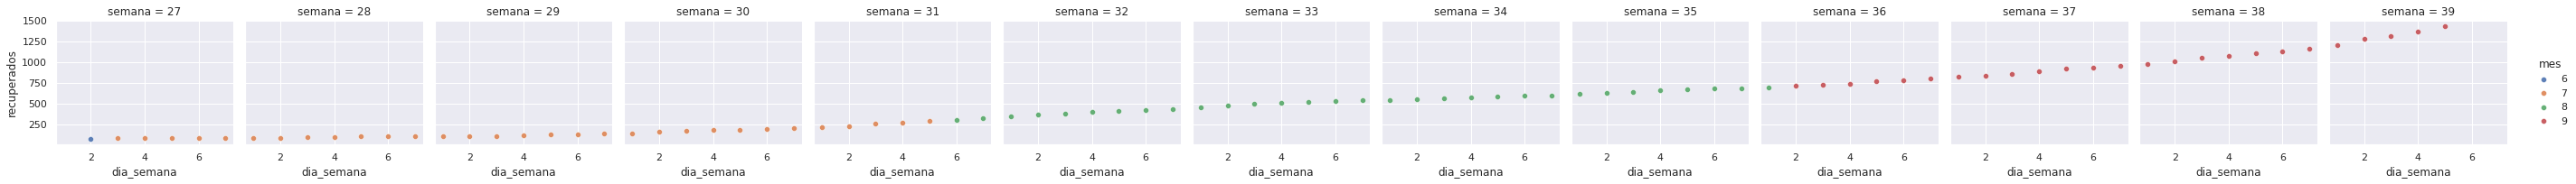

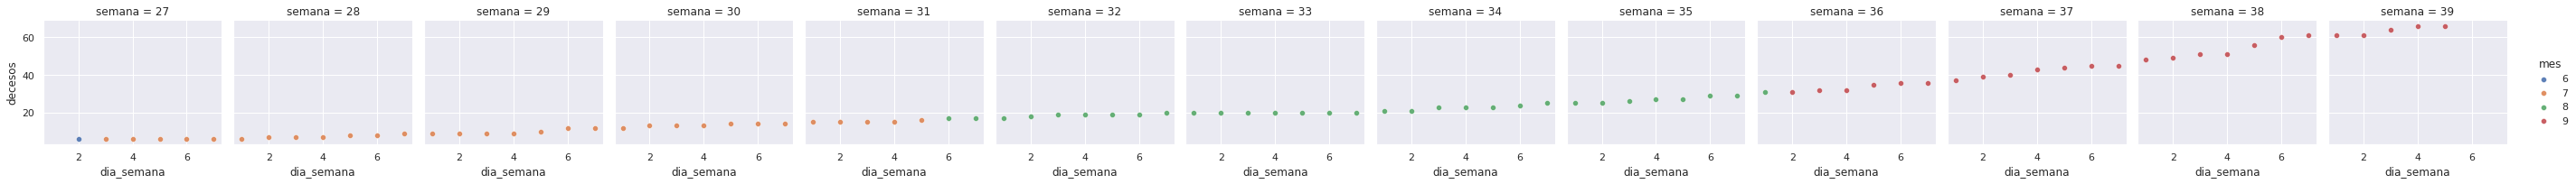

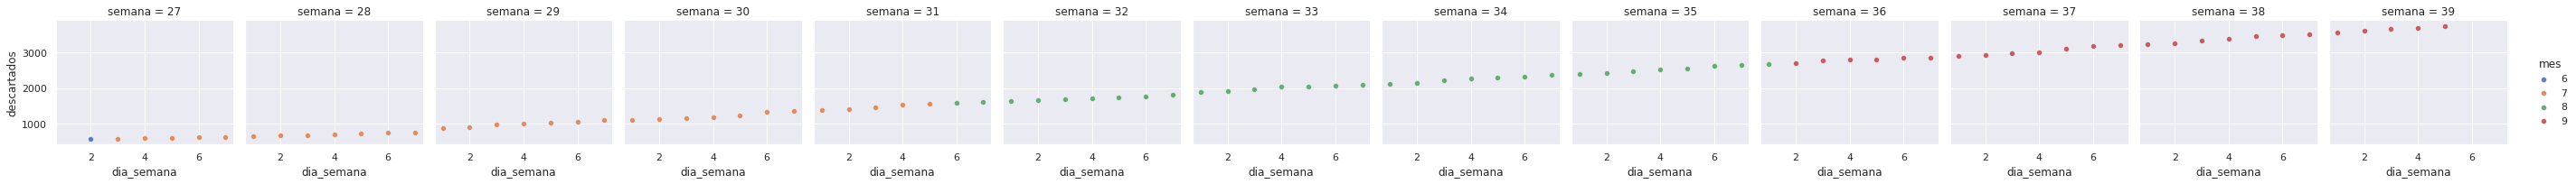

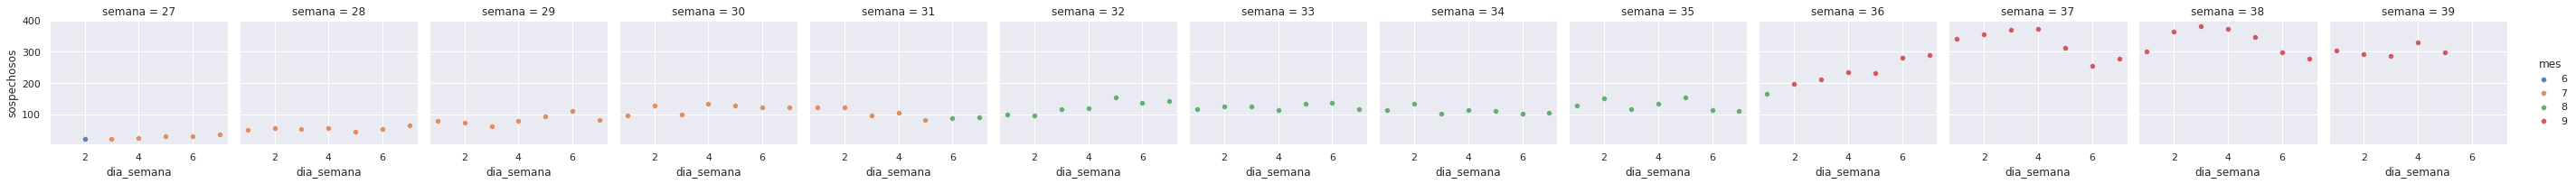

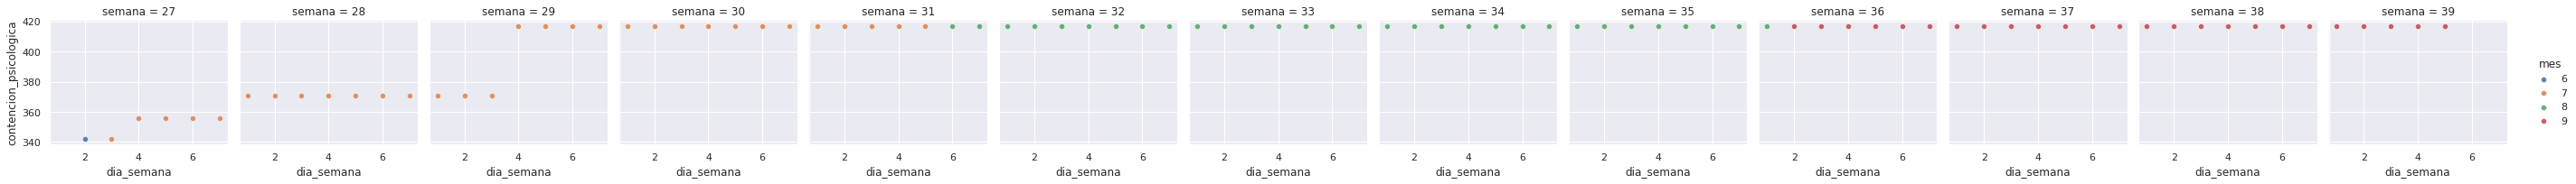

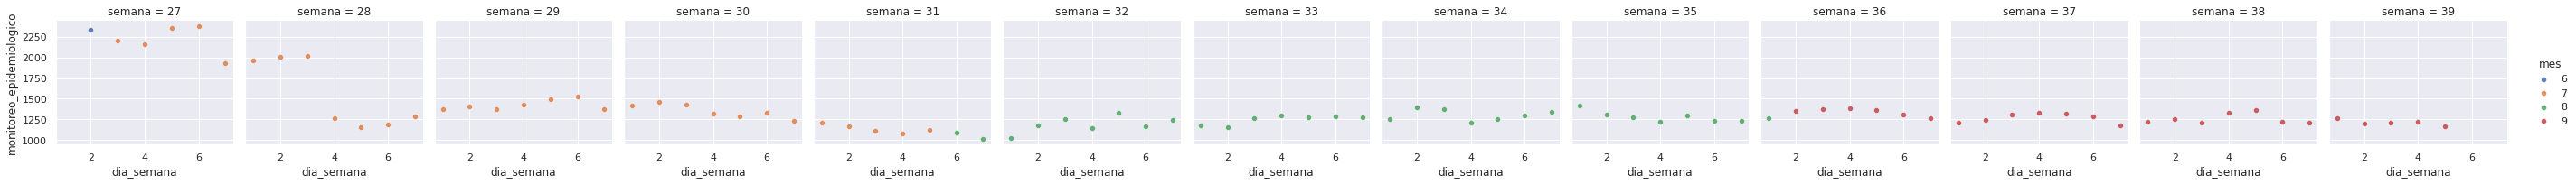

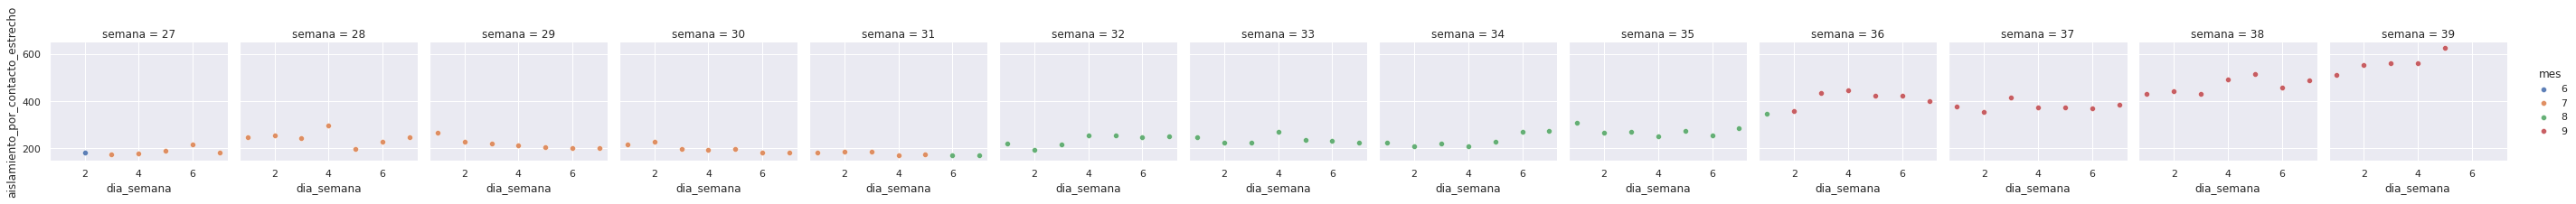

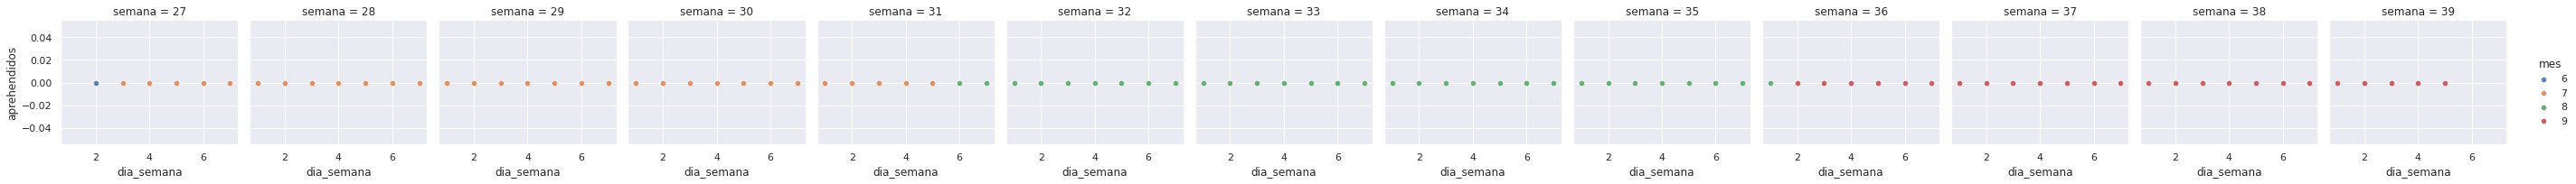

In [10]:
sns.set(style="darkgrid")
g2 = {a: sns.FacetGrid(db, hue ="mes", col='semana').map(sns.scatterplot, "dia_semana", str(a), alpha=.9).add_legend() for a in db2}

#Observaciones
Con respecto al numero de casos y decesos de covid, puede verse como en Bahia en este periodo de tiempo la tendencia siempre fue al aumento a pesar de las resticciones de cuarentena y como aumento mas acelaradamente a medida que se flexibilizaron las restricciones. 
No es muy claro el compotamiento del atributo contención psicologica el cual permanecio constantante en dos periodos de tiempo.

# **EJERCICIO # 2**

Generar un dataset similar al de la pág. 12 de este apunte (dos conjuntos Gaussianos con diferente media y DS, N=50 c/u, uno con etiqueta A y otro con etiqueta B).
Utilizar la curva ROC para proponer un umbral para un clasificador por mínimo error. Evaluar algunos de los parámetros de calidad (exactitud, precisión, f-measure).

In [11]:
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Generación del Dataseth

In [12]:
N_data = 50
mediaA = 2
desvA = 0.4
mediaB = 3.5
desvB = 0.6

In [16]:
XA, XB = np.random.normal(loc= mediaA, scale=desvA, size=N_data), np.random.normal(loc= mediaB, scale=desvB, size=N_data)
dfA, dfB = pd.DataFrame({'Etiqueta':'A','Valor': XA}), pd.DataFrame({'Etiqueta':'B','Valor': XB})
df = pd.concat([dfA,dfB], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Etiqueta,Valor
26,A,1.781720
83,B,3.095099
21,A,1.465144
18,A,1.865101
6,A,2.049072


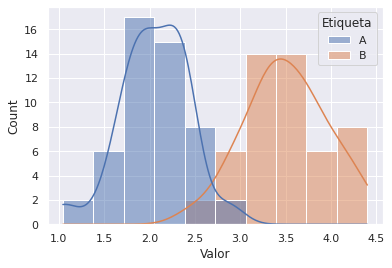

In [17]:
sns.histplot(data=df, x = "Valor", hue = "Etiqueta", bins=10, kde=True)

Se hizo una clasificación en función a la media y desviación de los dos Targets

In [18]:
claseA = mediaA + 2*desvA
claseB = mediaB - 2*desvB
print(claseA, claseB)

2.8 2.3


In [19]:
Umbral_clasicacion = (claseA+claseB)/2
Umbral_clasicacion 

2.55

Clasicador por minimo error, a partir del umbral encontrado

In [20]:
predictor = df.copy()
predictor['Target'] = [0 if x == 'A' else 1 for x in predictor['Etiqueta']]
if mediaA < mediaB: 
  predictor['Prediccion'] = [0 if x < Umbral_clasicacion else 1 for x in predictor['Valor']]
else:
  predictor['Prediccion'] = [1 if x < Umbral_clasicacion else 0 for x in predictor['Valor']]

Umbral = 2.55 accuracy = 0.97 precision = 0.961 recall 


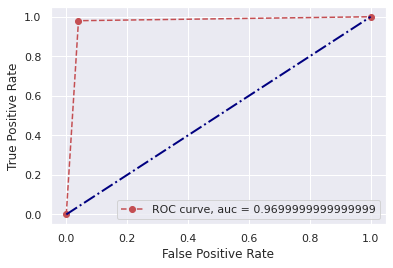

In [21]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(predictor['Target'],  predictor['Prediccion'])
auc = metrics.roc_auc_score(predictor['Target'],  predictor['Prediccion'])
acc = metrics.accuracy_score(predictor['Target'],  predictor['Prediccion']).round(3)
precision = metrics.precision_score(predictor['Target'],  predictor['Prediccion']).round(3)
recall = metrics.recall_score(predictor['Target'],  predictor['Prediccion']).round(3)
print('Umbral = '+str(Umbral_clasicacion )+' accuracy = '+str(acc)+' precision = '+str(precision)+ ' recall ')

plt.plot(fpr,tpr, 'ro--', label="ROC curve, auc = "+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

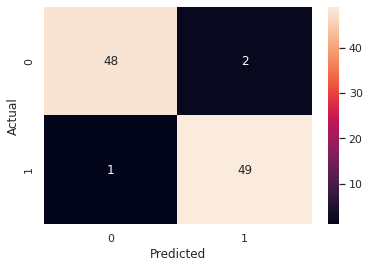

In [22]:
confusion_matrix = pd.crosstab(predictor['Target'], predictor['Prediccion'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

Verificación de los parametros de calidad del modelo de minimo error en funcion del umbral, en un rango menor y mayor. Con el objetivo de encontrar un mejor umbral.

Umbral = 1.75 accuracy = 0.59 precision = 0.549 recall 1.0


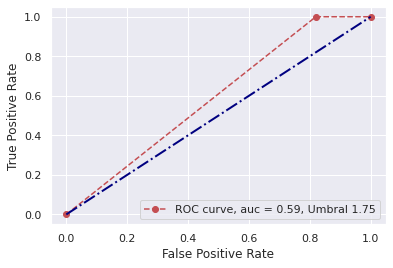

Umbral = 1.85 accuracy = 0.63 precision = 0.575 recall 1.0


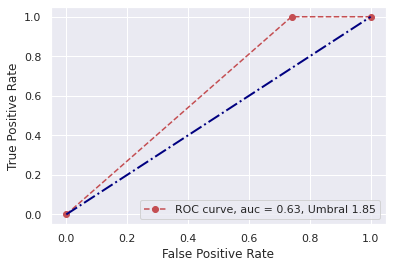

Umbral = 1.95 accuracy = 0.7 precision = 0.625 recall 1.0


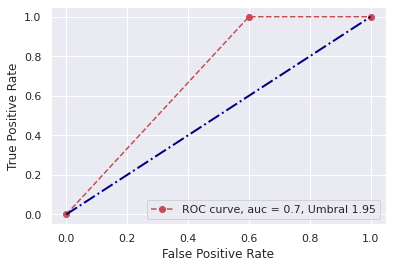

Umbral = 2.05 accuracy = 0.75 precision = 0.667 recall 1.0


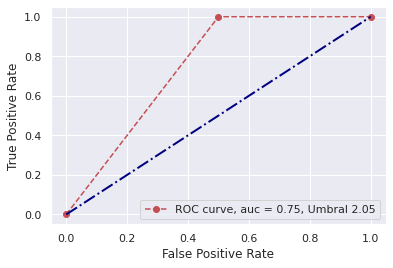

Umbral = 2.15 accuracy = 0.78 precision = 0.694 recall 1.0


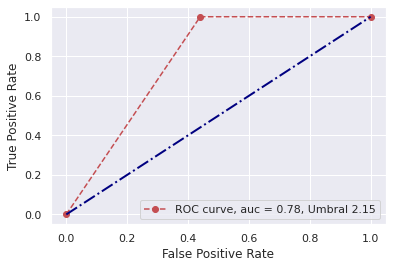

Umbral = 2.25 accuracy = 0.85 precision = 0.769 recall 1.0


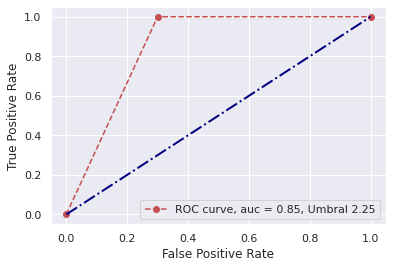

Umbral = 2.35 accuracy = 0.89 precision = 0.82 recall 1.0


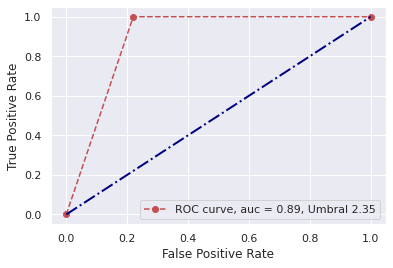

Umbral = 2.45 accuracy = 0.97 precision = 0.961 recall 0.98


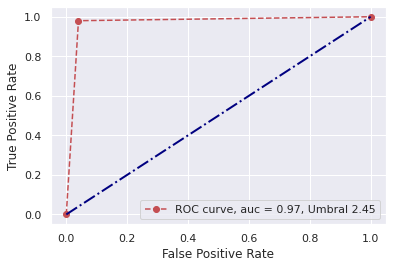

Umbral = 2.55 accuracy = 0.97 precision = 0.961 recall 0.98


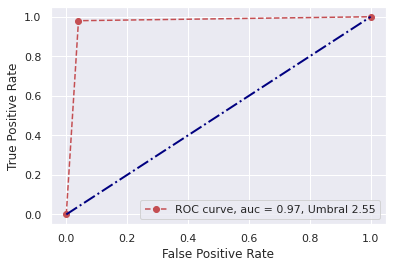

Umbral = 2.65 accuracy = 0.96 precision = 0.96 recall 0.96


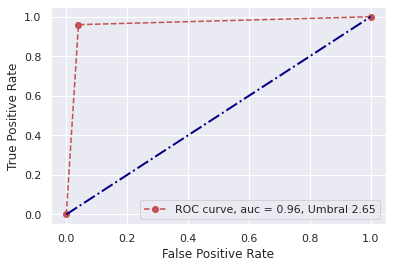

Umbral = 2.75 accuracy = 0.96 precision = 0.96 recall 0.96


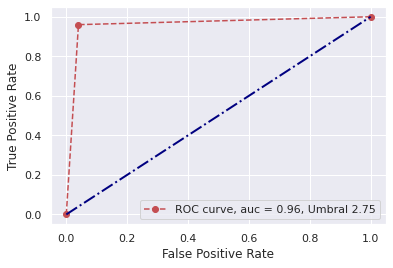

Umbral = 2.85 accuracy = 0.97 precision = 0.98 recall 0.96


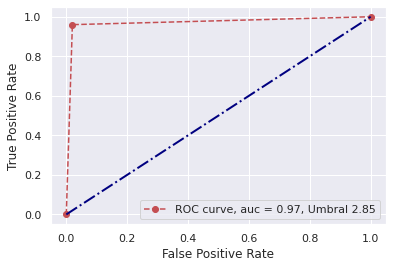

Umbral = 2.95 accuracy = 0.93 precision = 1.0 recall 0.86


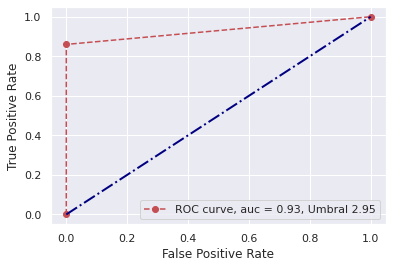

Umbral = 3.05 accuracy = 0.92 precision = 1.0 recall 0.84


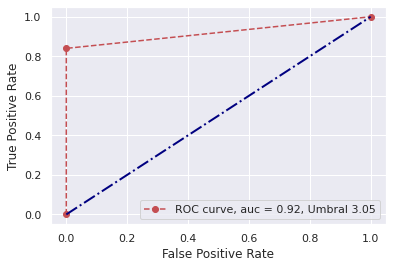

Umbral = 3.15 accuracy = 0.89 precision = 1.0 recall 0.78


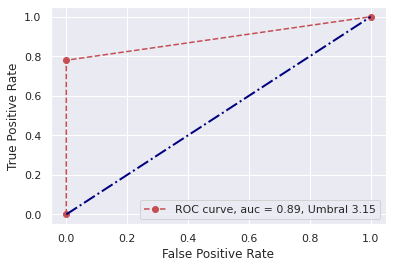

Umbral = 3.25 accuracy = 0.88 precision = 1.0 recall 0.76


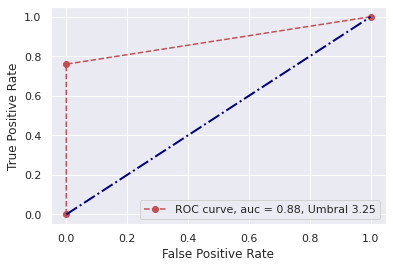

In [24]:
List_umbral = np.arange(Umbral_clasicacion-2*desvA, Umbral_clasicacion+2*desvA, 0.1).round(3)
predictor = df.copy()
predictor['Target'] = [0 if x == 'A' else 1 for x in predictor['Etiqueta']]

for a in List_umbral:
  
  if mediaA < mediaB: 
    predictor['Prediccion'+'_umbral_'+str(a)] = [0 if x < a else 1 for x in predictor['Valor']]
  else:
    predictor['Prediccion'+'_umbral_'+str(a)] = [1 if x < a else 0 for x in predictor['Valor']]
  
  acc = metrics.accuracy_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  precision = metrics.precision_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  recall = metrics.recall_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(3)
  print('Umbral = '+str(a)+' accuracy = '+str(acc)+' precision = '+str(precision)+ ' recall '+str(recall))

  fpr, tpr, _ = metrics.roc_curve(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)])
  auc = metrics.roc_auc_score(predictor['Target'],  predictor['Prediccion'+'_umbral_'+str(a)]).round(2)
  plt.plot(fpr,tpr, 'ro--', label="ROC curve, auc = " + str(auc) + ',' + ' Umbral ' + str(a))
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='-.')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()

# **Ejercicio # 3**

Dataset con 2 variables

In [25]:
N_data = 50
mediaA1 = 5
mediaB1 = 2
desvA1 = 2
desvB1 = 2.5

mediaA2 = 6
mediaB2 = 8
desvA2 = 2
desvB2 = 2

X1, Y1 = np.random.normal(loc= mediaA1, scale=desvA1, size=N_data), np.random.normal(loc= mediaB1, scale=desvB1, size=N_data)
df1 = pd.DataFrame({'Target':'A','X':X1,'Y':Y1})

X2, Y2 = np.random.normal(loc= mediaA2, scale=desvA2, size=N_data), np.random.normal(loc= mediaB2, scale=desvB2, size=N_data)
df2 = pd.DataFrame({'Target':'B','X':X2,'Y':Y2})

df = pd.concat([df1,df2], ignore_index= True, axis=0)
df = df.sample(n = N_data*2) 
df.head()

,Target,X,Y
83,B,12.808719,6.978388
34,A,8.079105,0.440164
65,B,6.175040,7.682888
32,A,7.932162,2.427274
14,A,3.254383,1.374385


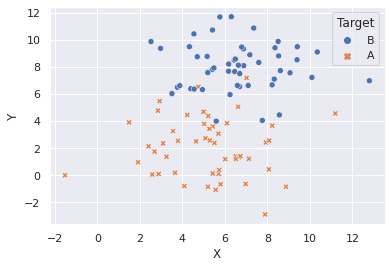

In [26]:
sns.scatterplot(data=df, x="X", y="Y", hue="Target", style="Target")

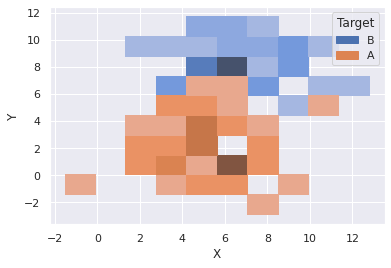

In [27]:
sns.histplot(df, x="X", y="Y", hue="Target", bins=10)